In [5]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create


# Now we need to read in the data

df = pd.read_csv("movie.csv")

In [6]:
# Now let's take a look at the data

df.head()

,Title,Year,Summary,Short Summary,Genres,IMDB ID,Runtime,YouTube Trailer,Rating,Movie Poster,Director,Writers,Cast
0,Patton Oswalt: Annihilation,2017,"Patton Oswald, despite a personal tragedy, pro...","Patton Oswalt, despite a personal tragedy, pro...",Uncategorized,tt7026230,66,4hZi5QaMBFc,7.4,https://hydramovies.com/wp-content/uploads/201...,Bobcat Goldthwait,Patton Oswalt,Patton Oswalt
1,New York Doll,2005,A recovering alcoholic and recently converted ...,A recovering alcoholic and recently converted ...,Documentary|Music,tt0436629,75,jwD04NsnLLg,7.9,https://hydramovies.com/wp-content/uploads/201...,Greg Whiteley,Arthur Kane,Sylvain Sylvain
2,Mickey's Magical Christmas: Snowed in at the H...,2001,After everyone is snowed in at the House of Mo...,Mickey and all his friends hold their own Chri...,Adventure|Animation|Comedy|Family|Fantasy,tt0300195,65,uCKwHHftrU4,6.8,https://hydramovies.com/wp-content/uploads/201...,Tony Craig,Thomas Hart,Carlos Alazraqui|Wayne Allwine
3,Mickey's House of Villains,2001,The villains from the popular animated Disney ...,The villains from the popular animated Disney ...,Animation|Comedy|Family|Fantasy|Horror,tt0329374,0,JA03ciYt-Ek,6.6,https://hydramovies.com/wp-content/uploads/201...,Jamie Mitchell,Thomas Hart,Tony Anselmo|Wayne Allwine
4,And Then I Go,2017,"In the cruel world of junior high, Edwin suffe...","In the cruel world of junior high, Edwin suffe...",Drama,tt2018111,99,8CdIiD6-iF0,7.6,https://hydramovies.com/wp-content/uploads/201...,Vincent Grashaw,Brett Haley,Arman Darbo|Sawyer Barth


In [7]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Title - 0.0%
Year - 0.0%
Summary - 0.0012690355329949238%
Short Summary - 0.0002538071065989848%
Genres - 0.0%
IMDB ID - 0.0%
Runtime - 0.0%
YouTube Trailer - 0.011928934010152284%
Rating - 0.0%
Movie Poster - 0.0%
Director - 0.0%
Writers - 0.004568527918781726%
Cast - 0.006091370558375634%


In [8]:
# Data Types for our columns

print(df.dtypes)

Title               object
Year                 int64
Summary             object
Short Summary       object
Genres              object
IMDB ID             object
Runtime              int64
YouTube Trailer     object
Rating             float64
Movie Poster        object
Director            object
Writers             object
Cast                object
dtype: object


In [9]:
#Change the datatypes of these column to integers

df['Rating'] = df['Rating'].astype('int64') 

In [10]:
# Now these field look just a bit better
df

,Title,Year,Summary,Short Summary,Genres,IMDB ID,Runtime,YouTube Trailer,Rating,Movie Poster,Director,Writers,Cast
0,Patton Oswalt: Annihilation,2017,"Patton Oswald, despite a personal tragedy, pro...","Patton Oswalt, despite a personal tragedy, pro...",Uncategorized,tt7026230,66,4hZi5QaMBFc,7,https://hydramovies.com/wp-content/uploads/201...,Bobcat Goldthwait,Patton Oswalt,Patton Oswalt
1,New York Doll,2005,A recovering alcoholic and recently converted ...,A recovering alcoholic and recently converted ...,Documentary|Music,tt0436629,75,jwD04NsnLLg,7,https://hydramovies.com/wp-content/uploads/201...,Greg Whiteley,Arthur Kane,Sylvain Sylvain
2,Mickey's Magical Christmas: Snowed in at the H...,2001,After everyone is snowed in at the House of Mo...,Mickey and all his friends hold their own Chri...,Adventure|Animation|Comedy|Family|Fantasy,tt0300195,65,uCKwHHftrU4,6,https://hydramovies.com/wp-content/uploads/201...,Tony Craig,Thomas Hart,Carlos Alazraqui|Wayne Allwine
3,Mickey's House of Villains,2001,The villains from the popular animated Disney ...,The villains from the popular animated Disney ...,Animation|Comedy|Family|Fantasy|Horror,tt0329374,0,JA03ciYt-Ek,6,https://hydramovies.com/wp-content/uploads/201...,Jamie Mitchell,Thomas Hart,Tony Anselmo|Wayne Allwine
4,And Then I Go,2017,"In the cruel world of junior high, Edwin suffe...","In the cruel world of junior high, Edwin suffe...",Drama,tt2018111,99,8CdIiD6-iF0,7,https://hydramovies.com/wp-content/uploads/201...,Vincent Grashaw,Brett Haley,Arman Darbo|Sawyer Barth
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935,Skyscraper,2018,FBI Hostage Rescue Team leader and U.S. war ve...,A security expert must infiltrate a burning sk...,Action|Thriller,tt5758778,102,t9QePUT-Yt8,6,https://hydramovies.com/wp-content/uploads/201...,Rawson Marshall Thurber,Rawson Marshall Thurber,Chin Han|Dwayne Johnson|Neve Campbell
3936,Trench 11,2017,"In the final days of WWI, an allied army unit ...","In the final days of WWI, an allied army unit ...",Horror|Thriller|War,tt5033290,90,bVDGukfxFAk,5,https://hydramovies.com/wp-content/uploads/201...,Leo Scherman,Matt Booi,Charlie Carrick|Robert Stadlober|Rossif Suther...
3937,My Daddy's in Heaven,2017,"Becca, Adam and their 5-year-old daughter Acie...","Becca, Adam and their 5-year-old daughter Acie...",Comedy|Drama|Family,tt6460276,92,bv0Eh2VhTTA,5,https://hydramovies.com/wp-content/uploads/201...,Waymon Boone,Joseph Nasser,Corbin Bernsen|Jenn Gotzon Chandler|Lee Benton
3938,Keeping Up with the Steins,2006,"In toney Brentwood, Benjamin Fiedler prepares ...",A 13-year-old boy uses his upcoming bar mitzva...,Comedy,tt0415949,90,8TKLR1_JVLU,5,https://hydramovies.com/wp-content/uploads/201...,Scott Marshall,Mark Zakarin,Daryl Sabara|Garry Marshall|Jeremy Piven


In [11]:
# Order our Data a little bit to see

df.sort_values(by=['Rating'], inplace=False, ascending=False)

# If you've never seen "I spit on your grave 2" I highly recommend it- way better than the first one

,Title,Year,Summary,Short Summary,Genres,IMDB ID,Runtime,YouTube Trailer,Rating,Movie Poster,Director,Writers,Cast
1491,The Dark Knight,2008,Set within a year after the events of Batman B...,When the menace known as the Joker emerges fro...,Action|Adventure|Crime|Drama|Thriller,tt0468569,152,EXeTwQWrcwY,9,https://hydramovies.com/wp-content/uploads/201...,Christopher Nolan,Jonathan Nolan,Christian Bale|Heath Ledger
3426,The Mountain II,2016,DAG II; tells the story of a clandestine speci...,In a desolate war zone where screams of the in...,Drama|War,tt5813916,135,jpByS8cbcVA,9,https://hydramovies.com/wp-content/uploads/201...,Alper Caglar,Alper Caglar,Bedii Akin|Murat Arkin|Ozan Agaç
2827,A Separation,2011,Nader (Payman Maadi) and Simin (Leila Hatami) ...,A married couple are faced with a difficult de...,Drama|Mystery,tt1832382,123,58Onuy5USTc,8,https://hydramovies.com/wp-content/uploads/201...,Asghar Farhadi,Asghar Farhadi,Leila Hatami|Payman Maadi|Sareh Bayat
1221,There Will Be Blood,2007,The intersecting life stories of Daniel Plainv...,"A story of family, religion, hatred, oil and m...",Action|Drama|History,tt0469494,158,FeSLPELpMeM,8,https://hydramovies.com/wp-content/uploads/201...,Paul Thomas Anderson,Paul Thomas Anderson,Ciarán Hinds|Daniel Day-Lewis|Paul Dano
1824,Pirates of the Caribbean: The Curse of the Bla...,2003,This swash-buckling tale follows the quest of ...,Blacksmith Will Turner teams up with eccentric...,Action|Adventure|Fantasy,tt0325980,143,naQr0uTrH_s,8,https://hydramovies.com/wp-content/uploads/201...,Gore Verbinski,Ted Elliott,Geoffrey Rush|Johnny Depp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205,Sinbad and the War of the Furies,2016,Sinbad (John Hennigan) wanted to be an archaeo...,"On a treasure hunt gone wrong, modern-day adve...",Action|Adventure,tt6231588,90,4lChOyoYYTY,2,https://hydramovies.com/wp-content/uploads/201...,Scott Wheeler,Scotty Mullen,Jamie Bernadette|John Hennigan|Josh Fingerhut
3349,Viking Legacy,2016,"In ancient times, there were seven sacred scro...","In ancient times, there were seven sacred scro...",Action|Adventure,tt5555554,83,lv6RtmzwkYI,2,https://hydramovies.com/wp-content/uploads/201...,Tom Barker,Victor Mawer,Hollie Burrows|James William Cooke|Liam Dascombe
3264,Geo-Disaster,2017,A family in Los Angeles finds themselves separ...,The effect of dark matter colliding with the e...,Action|Drama|Sci-Fi,tt7204400,87,Dwz2xtdwTNY,2,https://hydramovies.com/wp-content/uploads/201...,Thunder Levin,Thunder Levin,Erich Riegelmann|Matthew Pohlkamp|Natalie Pell...
3047,Beyond the Call to Duty,2016,"Five Spec Ops, Alpha Squad, head a simple Reco...","Five Spec Ops, Alpha Squad, head a simple Reco...",Action|Drama|Sci-Fi|Thriller|War,tt2351392,95,gJ7mISF9YA0,1,https://hydramovies.com/wp-content/uploads/201...,Aleksandar Ivicic,Aleksandar Ivicic,Chris Clark|Kevin Tanski|Robert Woodley


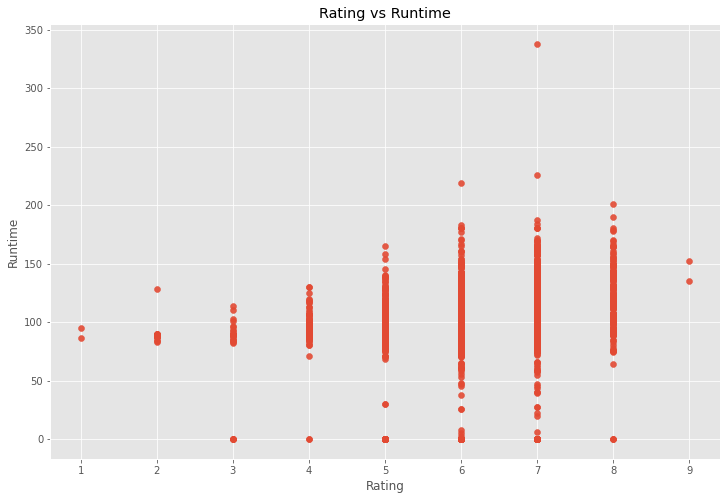

In [14]:
# Start with just the Scatter - add the title, xlabel, and ylabel after doing initial
plt.scatter(x=df['Rating'], y=df['Runtime'], alpha=0.9) # Alpha just changes the hue of the red dots
plt.title('Rating vs Runtime')
plt.xlabel('Rating')
plt.ylabel('Runtime')
plt.show()

<AxesSubplot:xlabel='Rating', ylabel='Runtime'>

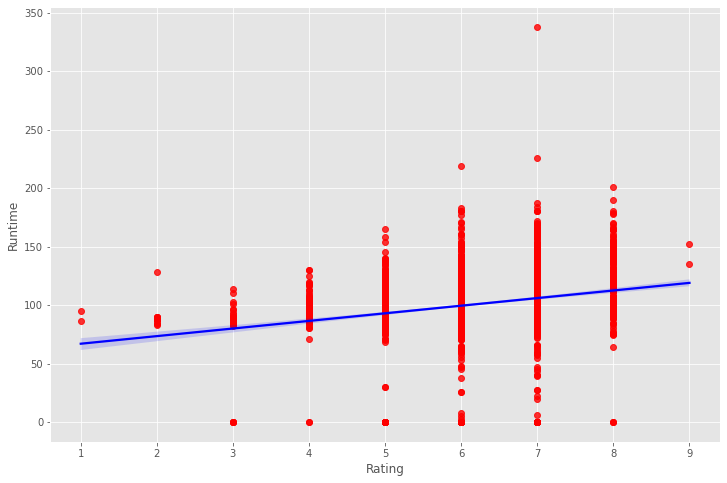

In [15]:
# Let's look at a plot of budget vs gross to see if the budget had any 

sns.regplot(x="Rating", y="Runtime", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

#Show other colors you can use (black, purple, green, orange, etc.)

In [16]:
df.corr() #methods are pearson, kendall, and spearman

,Year,Runtime,Rating
Year,1.000000,-0.079038,-0.237884
Runtime,-0.079038,1.000000,0.200861
Rating,-0.237884,0.200861,1.000000


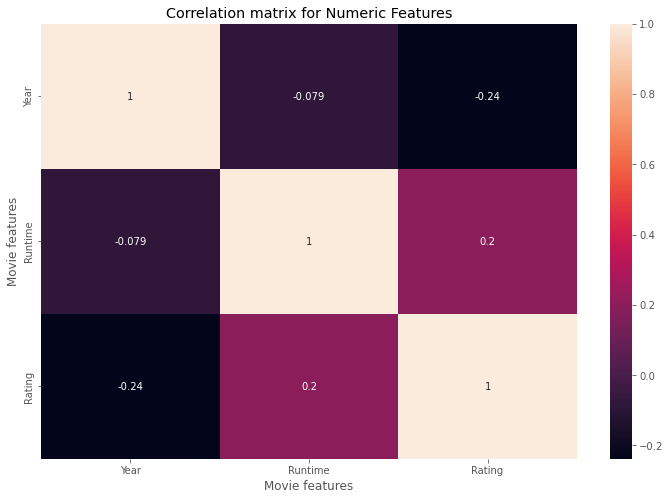

In [17]:
#Let's actually visualize what we are seeing in the above data

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True) #annot shows the value of the correlation

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

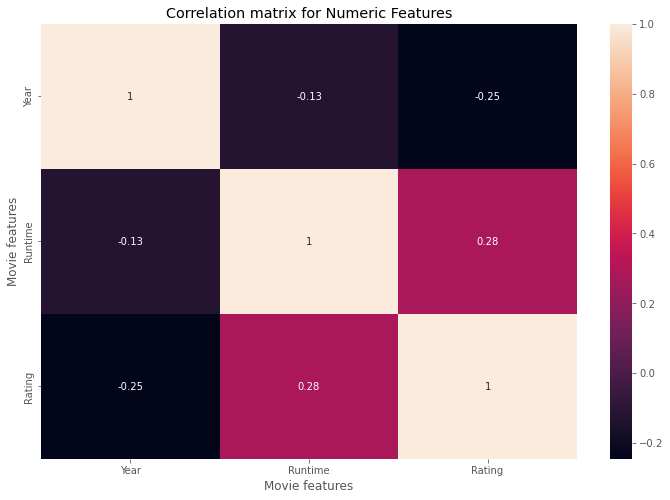

In [18]:
# There are different methods that you can use and each gives their own output
# I'll try to find a link in the description if you want to look into that 

correlation_matrix = df.corr(method='spearman') #methods are pearson, kendall, and spearman

sns.heatmap(correlation_matrix, annot = True) #annot shows the value of the correlation

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [19]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,Title,Year,Summary,Short Summary,Genres,IMDB ID,Runtime,YouTube Trailer,Rating,Movie Poster,Director,Writers,Cast
0,2213,2017,2693,2821,833,3850,66,358,7,1570,265,2127,3663
1,2061,2005,386,851,747,638,75,2976,7,1474,810,208,3792
2,1910,2001,646,2711,549,258,65,3559,6,1362,2281,2674,1243
3,1909,2001,3381,3410,601,325,0,1270,6,1361,950,2674,3811
4,242,2017,2001,2451,752,2035,99,593,7,166,2318,322,677
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935,2586,2018,1426,891,542,3605,102,3497,6,3898,1830,2252,1400
3936,3644,2017,2018,2461,823,3388,90,2432,5,3925,1349,1797,1346
3937,2016,2017,1030,1829,674,3780,92,2458,5,3884,2332,1437,1648
3938,1606,2006,2119,34,658,569,90,614,5,3877,2017,1776,1800


In [20]:
df_numerized.sort_values(by=['Rating'], inplace=False, ascending=False)

,Title,Year,Summary,Short Summary,Genres,IMDB ID,Runtime,YouTube Trailer,Rating,Movie Poster,Director,Writers,Cast
1491,2975,2008,2936,3848,73,743,152,999,9,2100,403,1410,1487
3426,3314,2016,1236,2373,804,3625,135,2969,9,3521,103,120,795
2827,123,2011,2557,701,789,1881,123,388,8,2822,187,212,3377
1221,3560,2007,3236,960,443,746,158,1067,8,2526,1743,2152,1563
1824,2248,2003,3459,1847,127,314,143,3188,8,1598,799,2653,2431
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205,2570,2016,2971,2788,1,3736,90,364,2,3192,2027,2463,2807
3349,3750,2016,1938,2418,1,3532,83,3097,2,3354,2261,2782,2615
3264,1156,2017,224,3182,486,3870,87,952,2,2984,2230,2682,2237
3047,428,2016,1465,2085,488,2315,95,2749,1,2880,59,75,1424


In [21]:
df.sort_values(by=['Rating'], inplace=False, ascending=False)

,Title,Year,Summary,Short Summary,Genres,IMDB ID,Runtime,YouTube Trailer,Rating,Movie Poster,Director,Writers,Cast
1491,2975,2008,2936,3848,73,743,152,999,9,2100,403,1410,1487
3426,3314,2016,1236,2373,804,3625,135,2969,9,3521,103,120,795
2827,123,2011,2557,701,789,1881,123,388,8,2822,187,212,3377
1221,3560,2007,3236,960,443,746,158,1067,8,2526,1743,2152,1563
1824,2248,2003,3459,1847,127,314,143,3188,8,1598,799,2653,2431
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205,2570,2016,2971,2788,1,3736,90,364,2,3192,2027,2463,2807
3349,3750,2016,1938,2418,1,3532,83,3097,2,3354,2261,2782,2615
3264,1156,2017,224,3182,486,3870,87,952,2,2984,2230,2682,2237
3047,428,2016,1465,2085,488,2315,95,2749,1,2880,59,75,1424


<AxesSubplot:xlabel='Rating', ylabel='Title'>

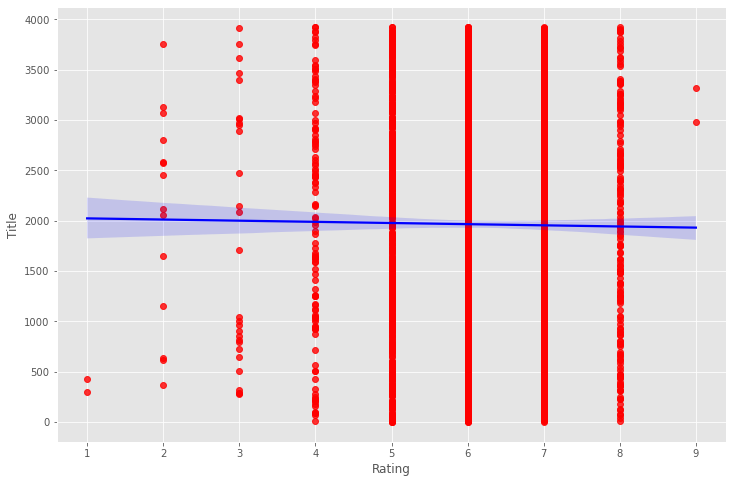

In [23]:
sns.regplot(x="Rating", y="Title", data=df_numerized, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

# This shows a very small correlation between these 2 contrary to what I believed at the beginning

In [25]:
#So we have our matrix above, but now we are going to unstack it to organize it a bit

correlation_mat = df_numerized.corr(method='pearson')

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

Title  Title            1.000000
       Year            -0.014927
       Summary          0.022838
       Short Summary    0.030762
       Genres          -0.018474
                          ...   
Cast   Rating           0.022866
       Movie Poster    -0.017880
       Director         0.030881
       Writers          0.027582
       Cast             1.000000
Length: 169, dtype: float64


In [26]:
sorted_pairs = corr_pairs.sort_values()
print(sorted_pairs)

Movie Poster   Rating          -0.389228
Rating         Movie Poster    -0.389228
Year           Rating          -0.237884
Rating         Year            -0.237884
IMDB ID        Rating          -0.211805
                                  ...   
Short Summary  Short Summary    1.000000
Summary        Summary          1.000000
Year           Year             1.000000
Writers        Writers          1.000000
Cast           Cast             1.000000
Length: 169, dtype: float64
